# In this particular session, we will look at how to read Time Series data and look at various measures of decomposition of the Time Series data. We will also look at various exploratory data analysis measures for Time Series data.

# Case Study - We are going to analyse the data of monthly beer production of Australia in the $20^{th}$ century.

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
import warnings
warnings.filterwarnings('ignore')

### Python allows us to read the data from a '.csv' file into a Time Series object in various ways. We are going to look at two ways to load Time Series data.

### Method 1:

In [2]:
#parse_dates- To tell our data set that we have date in our data
#squeeze-makethe data in series form
df_1 = pd.read_csv("Beer Australia.csv",parse_dates=True,squeeze=True,index_col=0)

In [3]:
df_1.head()

Month
1956-01-01    93.2
1956-02-01    96.0
1956-03-01    95.2
1956-04-01    77.1
1956-05-01    70.9
Name: Monthly beer production, dtype: float64

In [6]:
df_1.tail()

Month
1995-04-01    127.0
1995-05-01    151.0
1995-06-01    130.0
1995-07-01    119.0
1995-08-01    153.0
Name: Monthly beer production, dtype: float64

In [4]:
from pylab import rcParams
rcParams['figure.figsize']=20,8

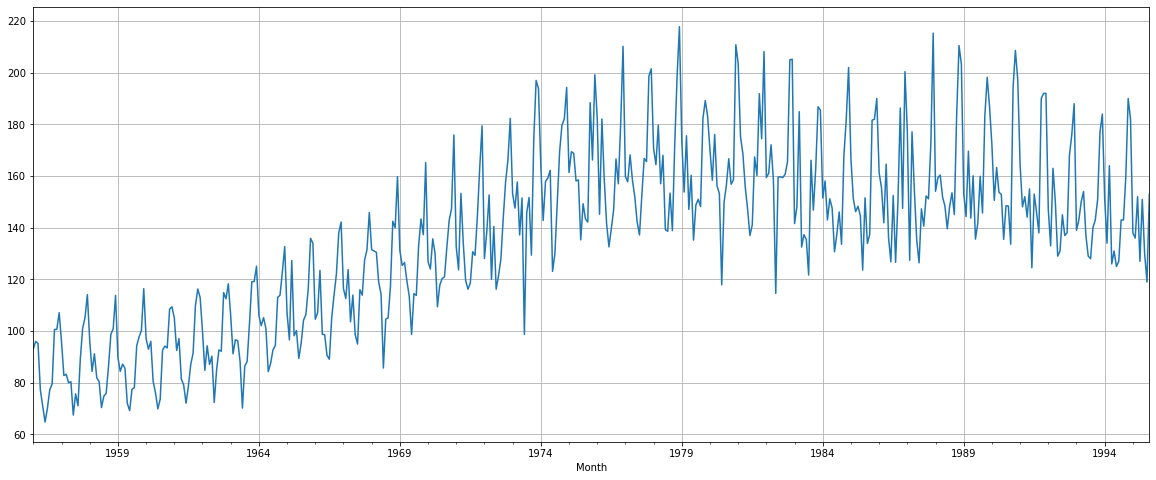

In [5]:
df_1.plot();
plt.grid()

### Method 2:

In [7]:
df_2 = pd.read_csv("Beer Australia.csv")

In [8]:
df_2.head()

,Month,Monthly beer production
0,1956-01,93.2
1,1956-02,96.0
2,1956-03,95.2
3,1956-04,77.1
4,1956-05,70.9


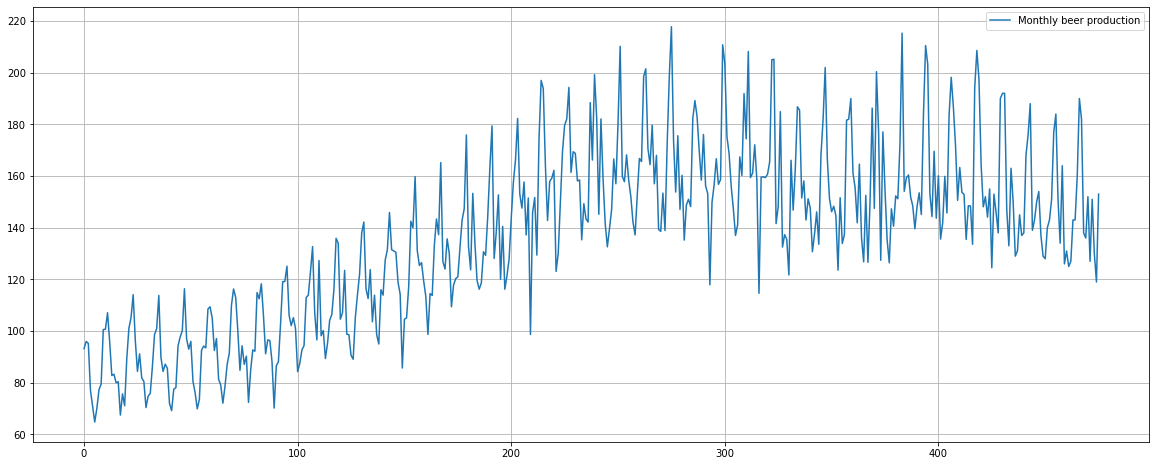

In [9]:
df_2.plot();
plt.grid()

Though the above plot looks like a Time Series plot, notice that the X-Axis is not time. In order to make the X-Axis as a Time Series, we need to pass the date range manually through a command in Pandas.

In [10]:
date = pd.date_range(start='1/1/1956', end='9/1/1995', freq='M')

The time stamps (in the above code snippet) is defined as a monthly Time Series after looking at the data. Please refer to the following documentation of the 'date_range' functionality in Pandas from $\href{https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.date_range.html}{here}$.

In [11]:
date

DatetimeIndex(['1956-01-31', '1956-02-29', '1956-03-31', '1956-04-30',
               '1956-05-31', '1956-06-30', '1956-07-31', '1956-08-31',
               '1956-09-30', '1956-10-31',
               ...
               '1994-11-30', '1994-12-31', '1995-01-31', '1995-02-28',
               '1995-03-31', '1995-04-30', '1995-05-31', '1995-06-30',
               '1995-07-31', '1995-08-31'],
              dtype='datetime64[ns]', length=476, freq='M')

In [12]:
df_2['Time_Stamp'] = pd.DataFrame(date)
df_2.head()

,Month,Monthly beer production,Time_Stamp
0,1956-01,93.2,1956-01-31
1,1956-02,96.0,1956-02-29
2,1956-03,95.2,1956-03-31
3,1956-04,77.1,1956-04-30
4,1956-05,70.9,1956-05-31


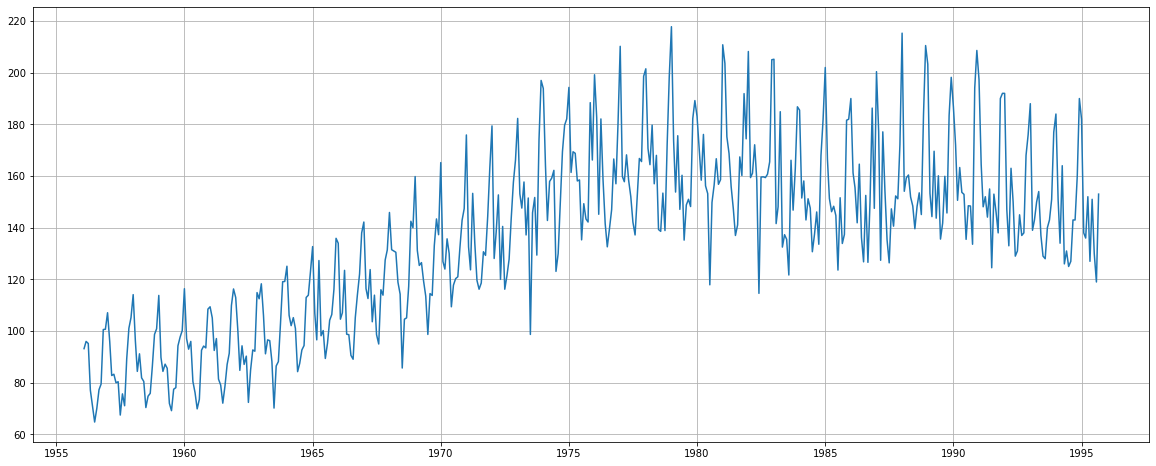

In [13]:
plt.plot(df_2['Time_Stamp'],df_2['Monthly beer production']);
plt.grid()

Now that we have seen how to load the data from a '.csv' file as a Time Series object, let us go ahead and analyse the Time Series plot that we got.

We notice that there is an increasing trend in the initial years which stabilizes as the years (or more specifically the months in each of the years) progresses. There is some kind of seasonality in the data as well.

# Find the mean and median of the monthly beer production.

In [14]:
df_1.describe()

count    476.000000
mean     136.395378
std       33.738725
min       64.800000
25%      112.900000
50%      139.150000
75%      158.825000
max      217.800000
Name: Monthly beer production, dtype: float64

# Get all the observations for all months for the year 1956.

The following is the code snippet to get all the particular observations from a particular year of interest.

In [15]:
df_1['1956']

Month
1956-01-01     93.2
1956-02-01     96.0
1956-03-01     95.2
1956-04-01     77.1
1956-05-01     70.9
1956-06-01     64.8
1956-07-01     70.1
1956-08-01     77.3
1956-09-01     79.5
1956-10-01    100.6
1956-11-01    100.7
1956-12-01    107.1
Name: Monthly beer production, dtype: float64

# Plot a year on year boxplot for the beer production.

Now, let us plot a box and whisker (1.5* IQR) plot to understand the spread of the data and check for outliers in each year, if any.

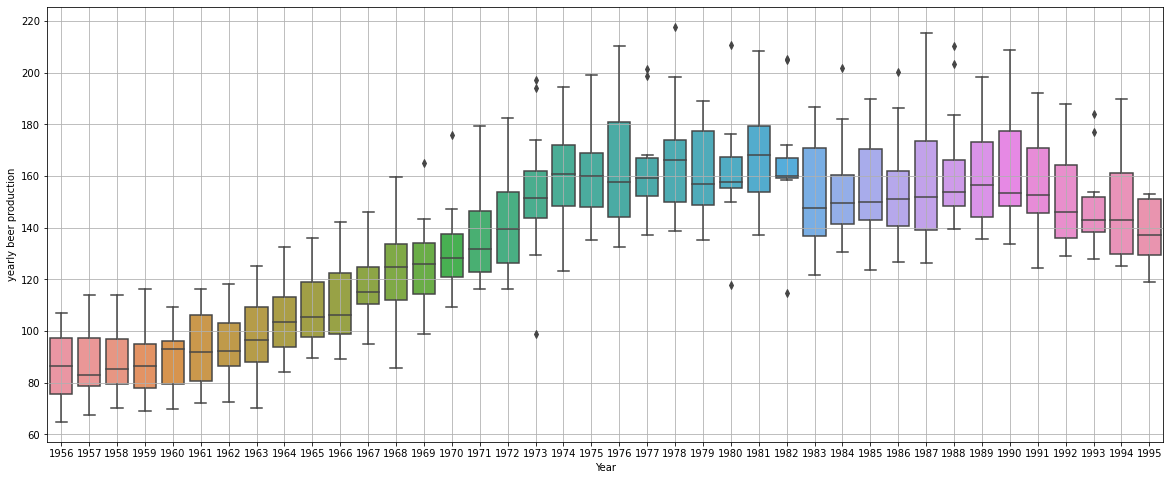

In [20]:
sns.boxplot(x=df_1.index.year,y=df_1);
plt.grid();
plt.ylabel('yearly beer production');
plt.xlabel('Year');

# Plot a monthly boxplot for the beer production taking all the years into account.

Since this is a monthly data, let us plot a box and whisker (1.5* IQR) plot to understand the spread of the data and check for outliers for every month across all the years, if any.

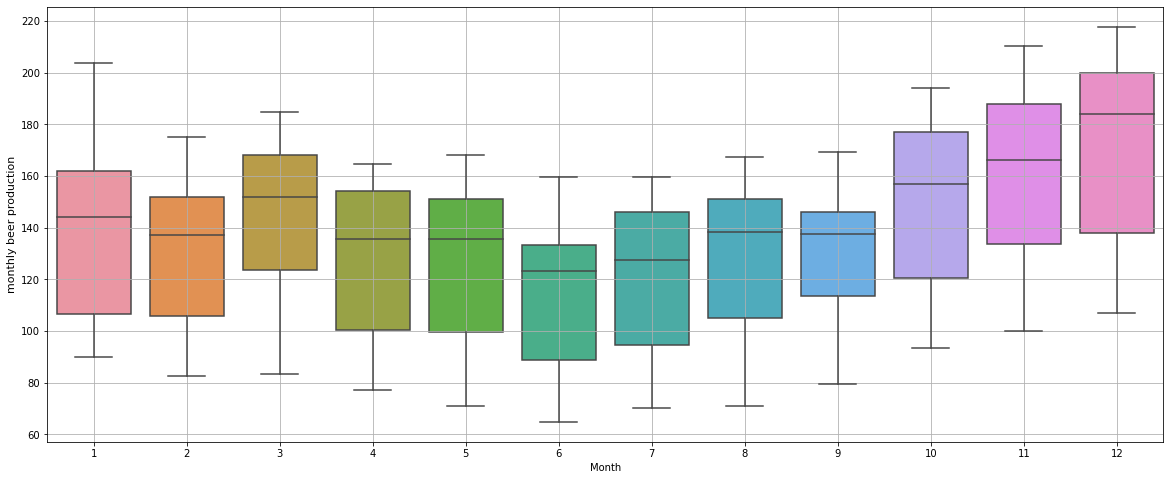

In [22]:
sns.boxplot(x=df_1.index.month,y=df_1);
plt.grid();
plt.ylabel('monthly beer production');
plt.xlabel('Month');

# Plot a monthplot of the give Time Series.

In [23]:
from statsmodels.graphics.tsaplots import month_plot

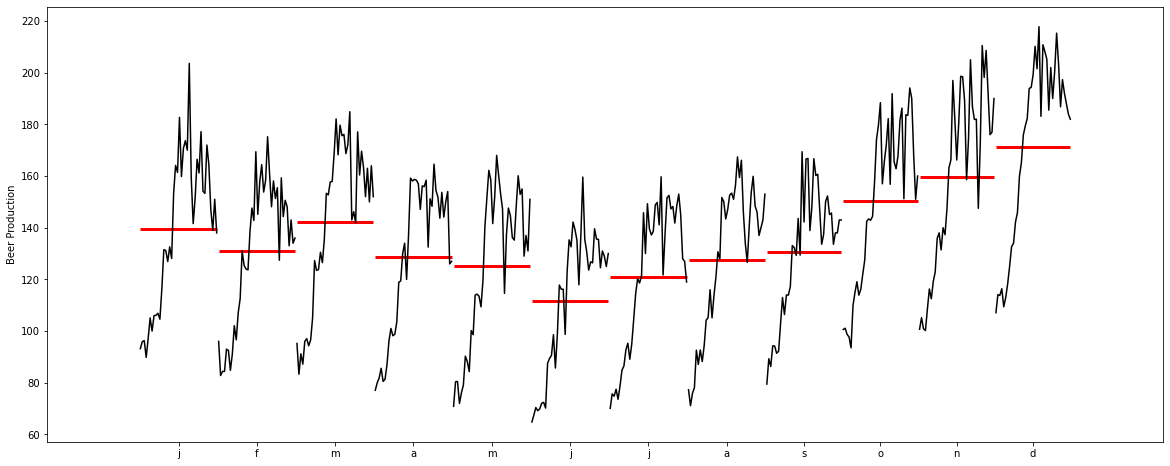

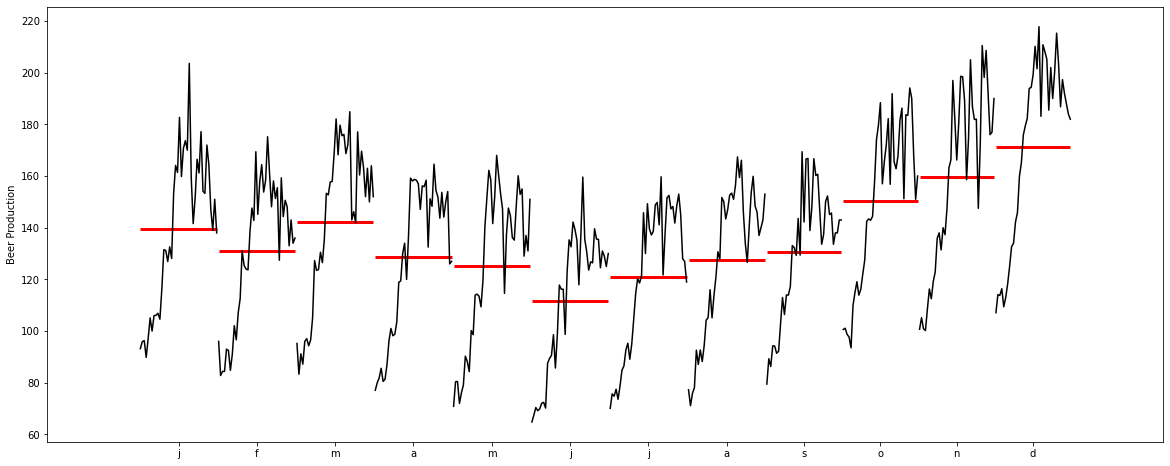

In [25]:
month_plot(df_1, ylabel='Beer Production');                       # Red-lines is average

# Plot the Time Series according to different months for different years.

In [29]:
df_2.set_index(keys='Time_Stamp', drop=True, inplace=True)

In [30]:
df_2.head()

,Month,Monthly beer production
Time_Stamp,,
1956-01-31,1956-01,93.2
1956-02-29,1956-02,96.0
1956-03-31,1956-03,95.2
1956-04-30,1956-04,77.1
1956-05-31,1956-05,70.9


In [31]:
df_2.drop('Month',axis=1,inplace=True)

In [33]:
yearly_sales_accross_months=pd.pivot_table(df_2,values='Monthly beer production',columns=df_2.index.month,index=df_2.index.year)

In [35]:
yearly_sales_accross_months

Time_Stamp,1,2,3,4,5,6,7,8,9,10,11,12
Time_Stamp,,,,,,,,,,,,
1956,93.2,96.0,95.2,77.1,70.9,64.8,70.1,77.3,79.5,100.6,100.7,107.1
1957,95.9,82.8,83.3,80.0,80.4,67.5,75.7,71.1,89.3,101.1,105.2,114.1
1958,96.3,84.4,91.2,81.9,80.5,70.4,74.8,75.9,86.3,98.7,100.9,113.8
1959,89.8,84.4,87.2,85.6,72.0,69.2,77.5,78.1,94.3,97.7,100.2,116.4
1960,97.1,93.0,96.0,80.5,76.1,69.9,73.6,92.6,94.2,93.5,108.5,109.4
1961,105.1,92.5,97.1,81.4,79.1,72.1,78.7,87.1,91.4,109.9,116.3,113.0
1962,100.0,84.8,94.3,87.1,90.3,72.4,84.9,92.7,92.2,114.9,112.5,118.3
1963,106.0,91.2,96.6,96.3,88.2,70.2,86.5,88.2,102.8,119.1,119.2,125.1
1964,106.1,102.1,105.2,101.0,84.3,87.5,92.7,94.4,113.0,113.9,122.9,132.7


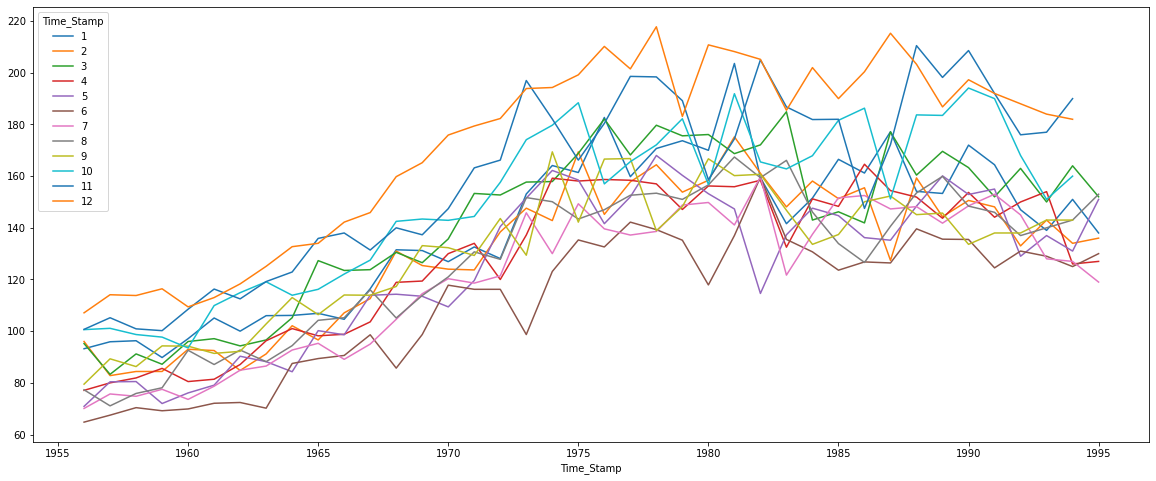

In [34]:
yearly_sales_accross_months.plot();

# Read this monthly data into a quarterly and yearly format. Compare the Time Series plot and draw inferences.

### The concept of resampling will be covered in the video lectures of Second Week as well.

### Yearly Plot

Let us try to resample or aggregate the Time Series from an annual perspective and sum up the observations of each month.

In [36]:
yearly_sum=df_1.resample('A').sum()

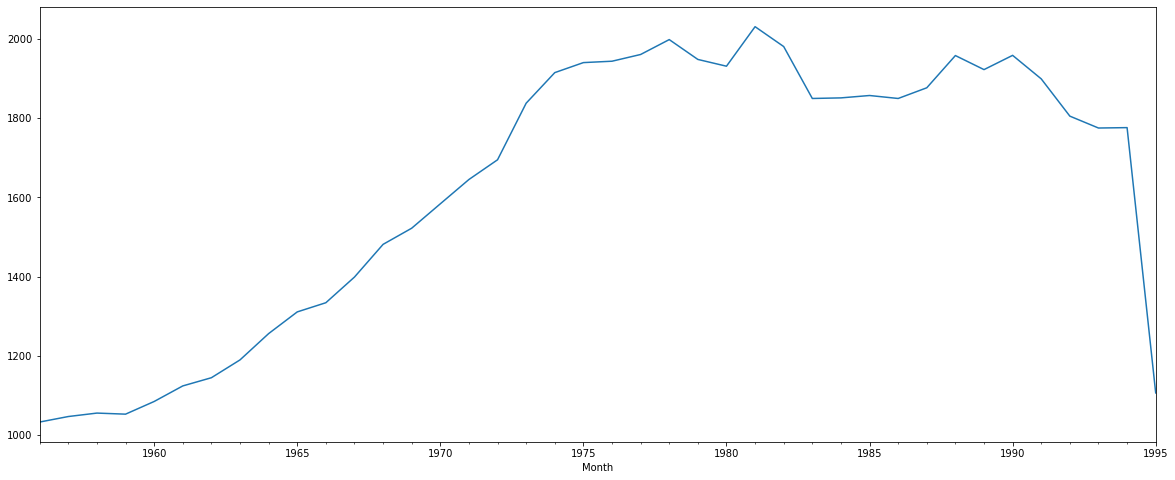

In [37]:
yearly_sum.plot();

Let us try to resample or aggregate the Time Series from an annual perspective and take the mean of the observations of the year considering each month as an observation.

In [38]:
yearly_avg=df_1.resample('A').mean()

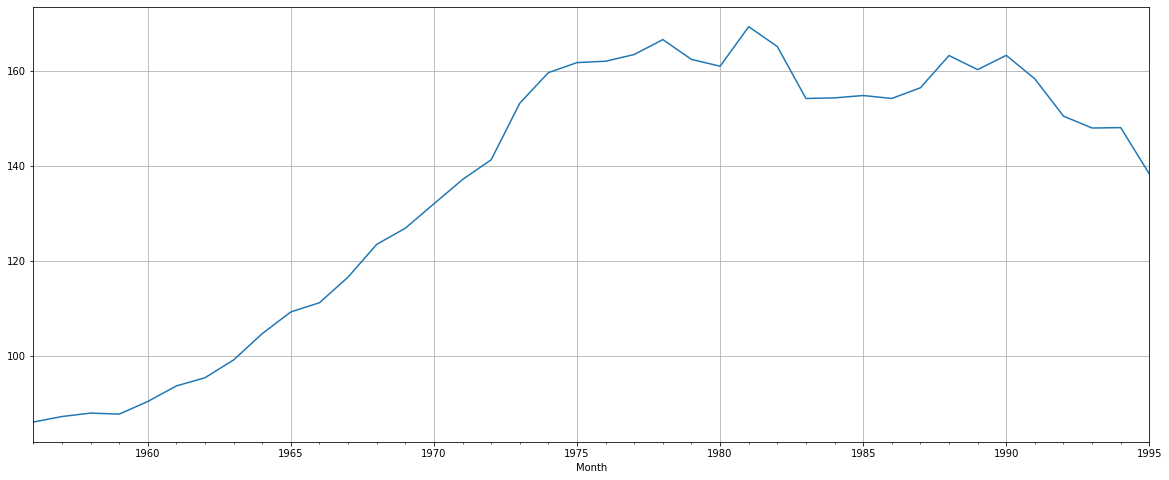

In [41]:
yearly_avg.plot();
plt.grid();

### Quarterly Plot

In [42]:
qtr_sum=df_1.resample('Q').sum()

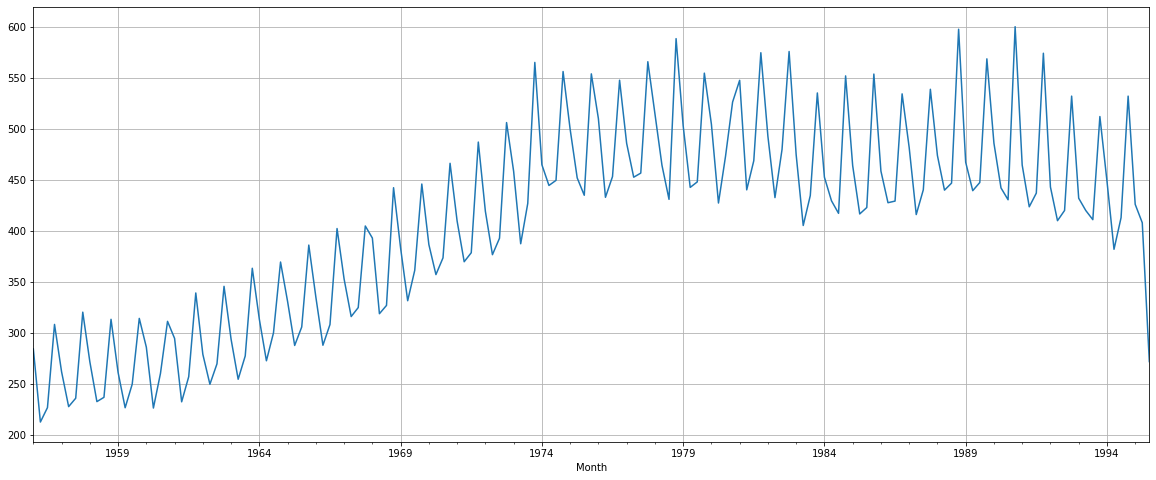

In [44]:
qtr_sum.plot();
plt.grid();

In [47]:
qtr_avg=df_1.resample('Q').mean()

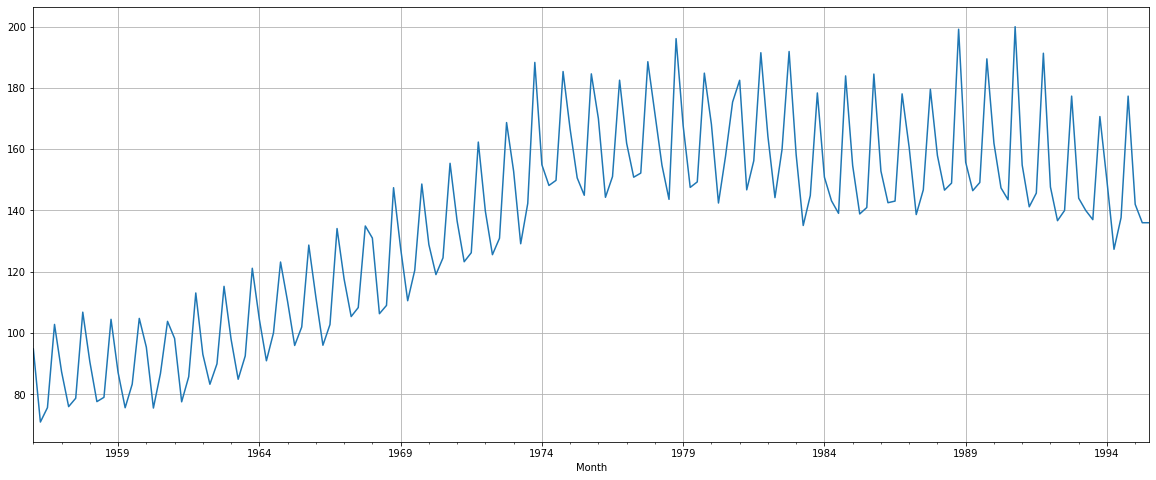

In [48]:
qtr_avg.plot();
plt.grid();

### Daily Plot

Now, let us try to understand the data from a daily perspective.

In [45]:
daily_sum=df_1.resample('D').sum()

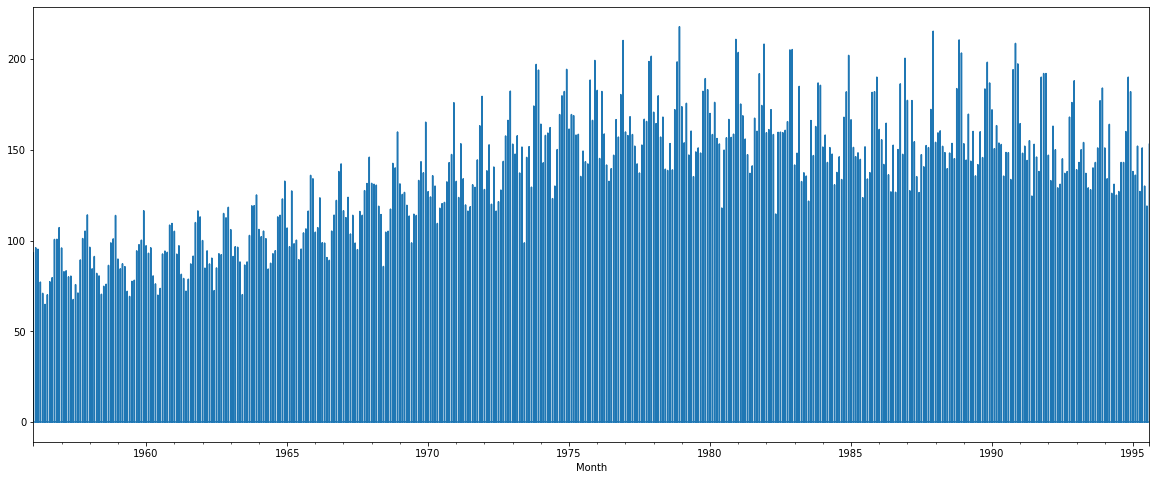

In [46]:
daily_sum.plot();

The values which the original series cannot provide is taken as 0 by python if we try to resample the data on a daily basis.

The above graph fails to give us a proper understanding of our data. Thus, resampling the data to intervals where a number of observations are 0 is not a good idea as that does not give us an understanding of the performance of the time series.

To get a very high-level overview of the trend of the Time Series Data (if Trend is present) can be understood by resampling the data keeping the intervals very large.

### Decade Plot

In [49]:
deacde_sum=df_1.resample('10Y').sum()

<AxesSubplot:xlabel='Month'>

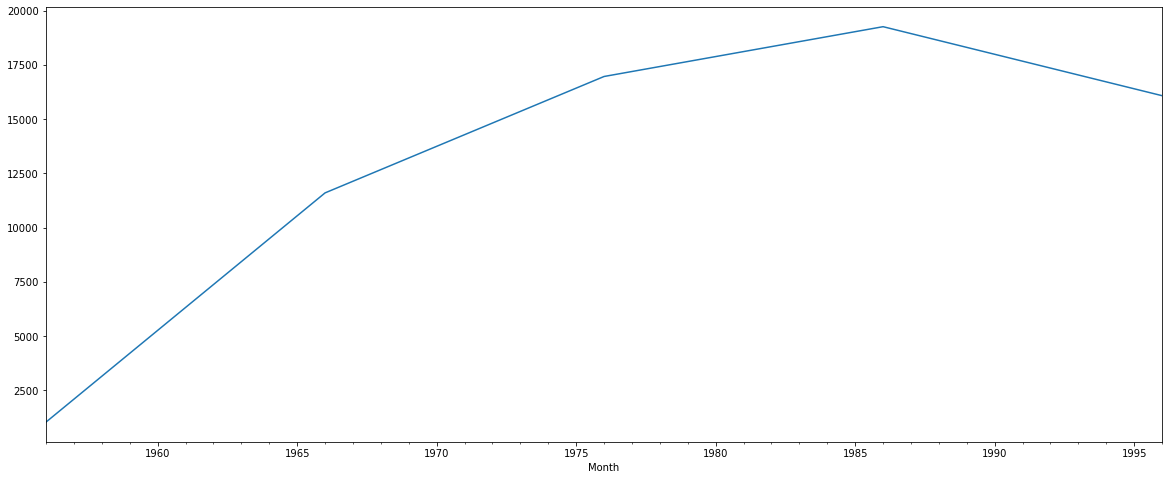

In [50]:
deacde_sum.plot()

If we take the resampling period to be 10 years or a decade, we see that the seasonality present has been smoothed over and it is only giving an estimate of the trend.

# Decompose the Time Series

### Additive Model

In [51]:
from statsmodels.tsa.seasonal import seasonal_decompose

In [52]:
decompsition=seasonal_decompose(df_1,model='additive')

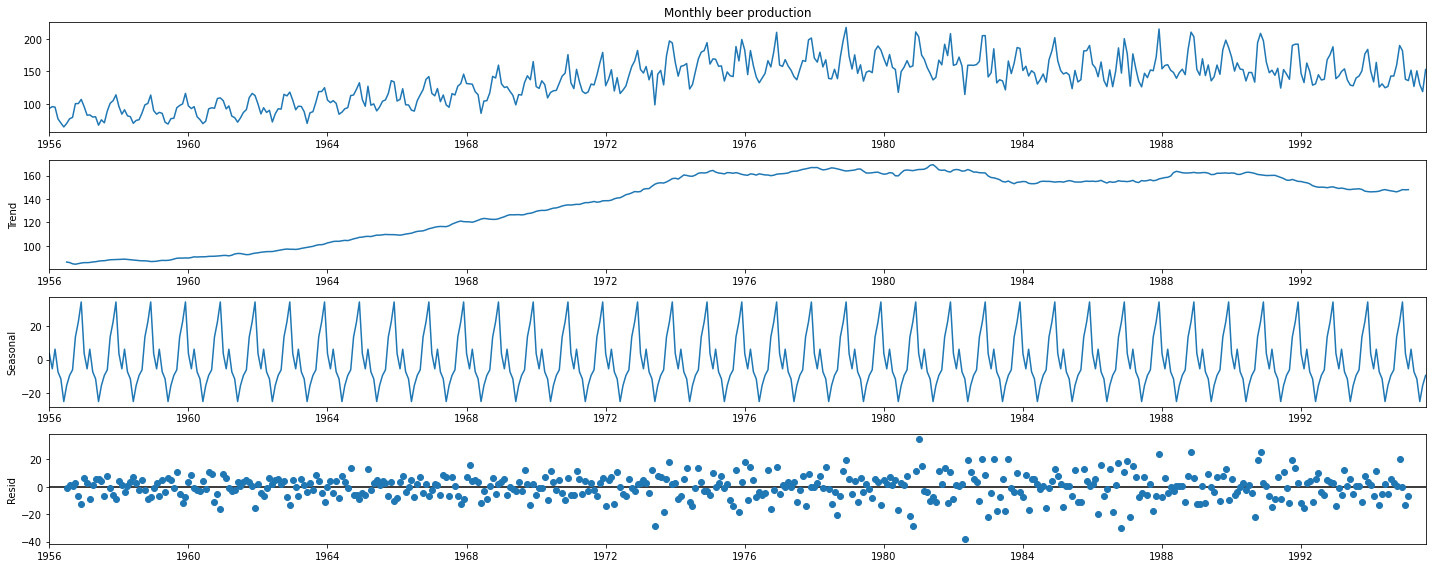

In [54]:
decompsition.plot();

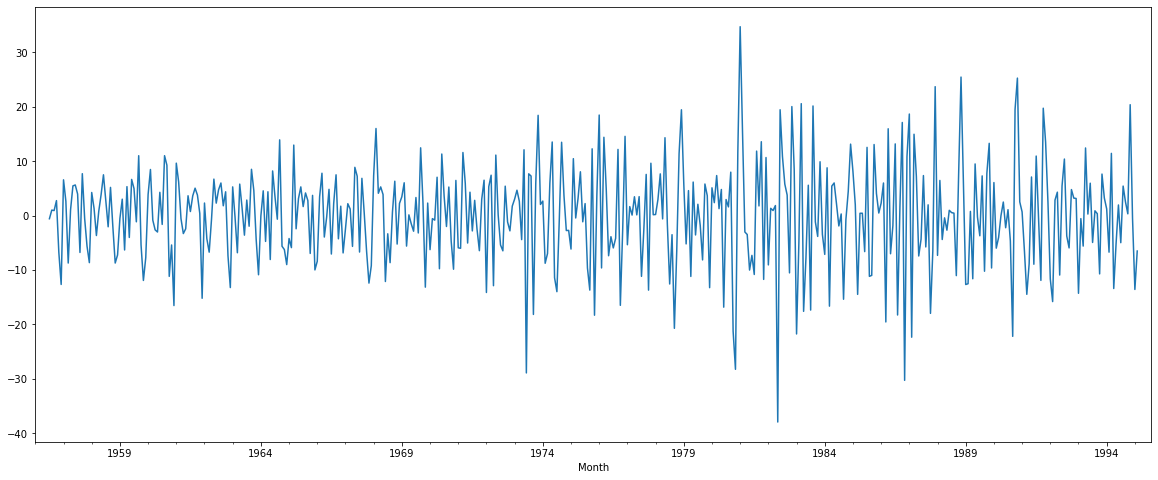

In [55]:
decompsition.resid.plot();

In [61]:
df_1.head(10)

Month
1956-01-01     93.2
1956-02-01     96.0
1956-03-01     95.2
1956-04-01     77.1
1956-05-01     70.9
1956-06-01     64.8
1956-07-01     70.1
1956-08-01     77.3
1956-09-01     79.5
1956-10-01    100.6
Name: Monthly beer production, dtype: float64

In [57]:
# yt=Tt+St+Rt
decompsition.trend.head(20)

Month
1956-01-01          NaN
1956-02-01          NaN
1956-03-01          NaN
1956-04-01          NaN
1956-05-01          NaN
1956-06-01          NaN
1956-07-01    86.154167
1956-08-01    85.716667
1956-09-01    84.670833
1956-10-01    84.295833
1956-11-01    84.812500
1956-12-01    85.320833
1957-01-01    85.666667
1957-02-01    85.641667
1957-03-01    85.791667
1957-04-01    86.220833
1957-05-01    86.429167
1957-06-01    86.908333
1957-07-01    87.216667
1957-08-01    87.300000
Name: trend, dtype: float64

In [59]:
Seasonality.head(10)

Month
1956-01-01     3.643172
1956-02-01    -5.500204
1956-03-01     6.215633
1956-04-01    -7.319126
1956-05-01   -11.503226
1956-06-01   -25.051691
1956-07-01   -15.491764
1956-08-01    -9.438772
1956-09-01    -6.113986
1956-10-01    13.536121
Name: seasonal, dtype: float64

In [60]:
Residual.head(10)

Month
1956-01-01         NaN
1956-02-01         NaN
1956-03-01         NaN
1956-04-01         NaN
1956-05-01         NaN
1956-06-01         NaN
1956-07-01   -0.562403
1956-08-01    1.022106
1956-09-01    0.943153
1956-10-01    2.768046
Name: resid, dtype: float64

In [64]:
Trend=decompsition.trend
Seasonality=decompsition.seasonal
Residual=decompsition.resid

In [66]:
# Desasonalizing the TS
Deseason_TS=Trend+Residual

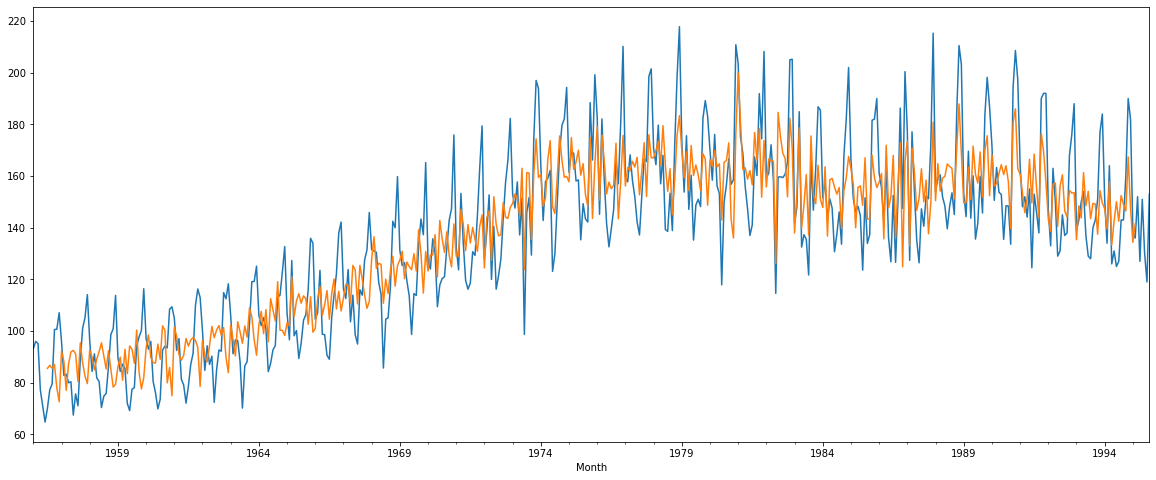

In [69]:
df_1.plot();
Deseason_TS.plot();

In [ ]:
#  Hear we can see Deseason picking the seasonal pattern n that's wrong.
#  If the model is ri8 model then it should not pick seasonl patteren.
#  so, here we choose multiplicative model.

## Multiplicative

In [70]:
decompsition=seasonal_decompose(df_1,model='multiplicative')

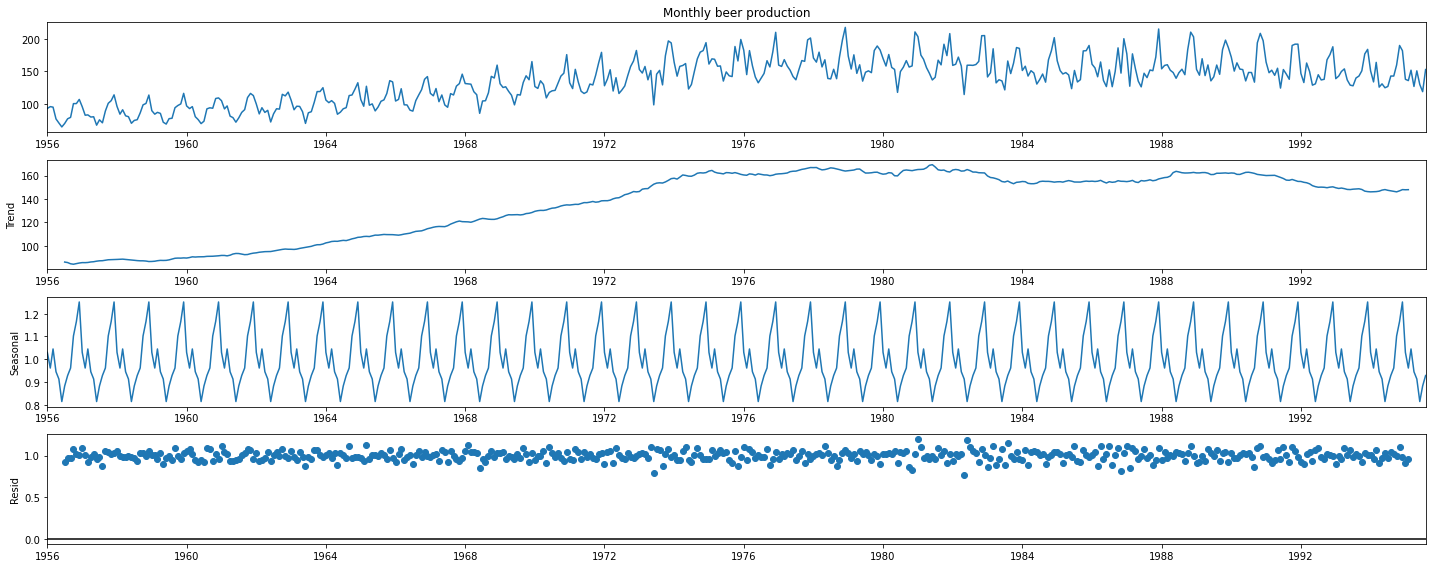

In [71]:
decompsition.plot();

In [72]:
Trend=decompsition.trend
Seasonality=decompsition.seasonal
Residual=decompsition.resid

In [73]:
# Desasonalizing the TS
Deseason_TS=Trend+Residual

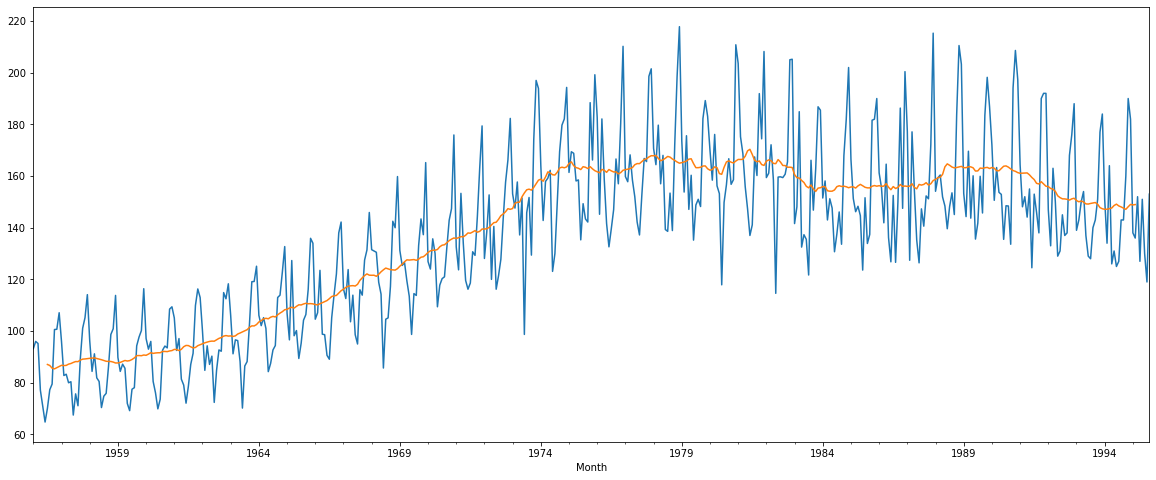

In [74]:
df_1.plot();
Deseason_TS.plot();

# Missing Value Handling

Methods of imputation for replacing missing values (meaningful values)

| Method | When suitable |
| ---------------------------- | ------------------------------------ |
| Take average of the nearest neighbours | Data has no seasonality |
| Take average of the seasons from two or all available years | Data has seasonality |
| Interpolate function of pandas |  |
| Linear interpolation | Relationship in the interval of two samples is a first order polynomial |
| Polynomial such as Quadratic or Cubic interpolation | Second or third order polynomial describes the interval between two samples |
| Spline | Handles non-uniform spacing of samples |

This particular data does not contain any missing values. Let us try to insert a missing value and then impute it using the methods at our disposal.

We are going to replace the value '183.1' with a NaN value.

In [75]:
df_1['1979'].tail()

Month
1979-08-01    151.0
1979-09-01    148.2
1979-10-01    182.2
1979-11-01    189.2
1979-12-01    183.1
Name: Monthly beer production, dtype: float64

In [76]:
df_missing_value = df_1.replace(to_replace=183.1,value=np.NaN)

Let us check whether the value has been replaced with a NaN value.

In [77]:
df_missing_value.isna().sum()

1

We see that there is one missing value present.

Now, let us impute that with the methods at our disposal.

In [78]:
df_missing_value.interpolate()['1979'].tail()

Month
1979-08-01    151.0
1979-09-01    148.2
1979-10-01    182.2
1979-11-01    189.2
1979-12-01    179.6
Name: Monthly beer production, dtype: float64

We see that the newly imputed value is '179.6' compared to the old value of '183.1'.

In [79]:
df_missing_value.interpolate(method='spline',order=1)['1979'].tail()

Month
1979-08-01    151.000000
1979-09-01    148.200000
1979-10-01    182.200000
1979-11-01    189.200000
1979-12-01    179.531764
Name: Monthly beer production, dtype: float64

In [80]:
df_missing_value.interpolate(method='spline',order=2)['1979'].tail()

Month
1979-08-01    151.000000
1979-09-01    148.200000
1979-10-01    182.200000
1979-11-01    189.200000
1979-12-01    176.156693
Name: Monthly beer production, dtype: float64

In [81]:
df_missing_value.interpolate(method='spline',order=3)['1979'].tail()

Month
1979-08-01    151.000000
1979-09-01    148.200000
1979-10-01    182.200000
1979-11-01    189.200000
1979-12-01    184.008257
Name: Monthly beer production, dtype: float64

In [84]:
df_missing_value.interpolate(method='polynomial',order=2)['1979'].tail()

Month
1979-08-01    151.000000
1979-09-01    148.200000
1979-10-01    182.200000
1979-11-01    189.200000
1979-12-01    183.249613
Name: Monthly beer production, dtype: float64

# If we have many null values, then we make a known value to a null value then we look for the method which will give a result nearer to known value. Then we apply that method to treat the null value.

For better understanding of the interpolate function for imputing the missing values, please refer to the documentation $\href{https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.interpolate.html}{here}$.

# END